In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [6]:
mins_played=pd.read_excel("Under21_minutes_played.xlsx",index_col=0)
all_teams=pd.read_excel("Under21_minutes_played_teams.xlsx",index_col=0)

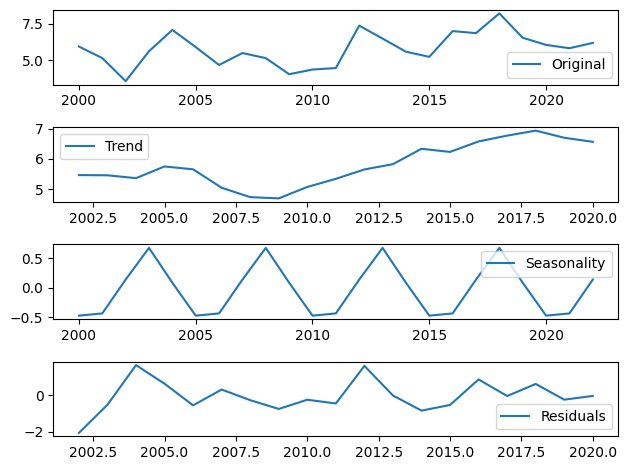

In [7]:
#seasonal decomposition of the time series
decomposition = seasonal_decompose(mins_played["Minutes_played_under21"][33:], period=5)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(mins_played["Minutes_played_under21"][33:], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [8]:
#calculate the variance of the trend
import statistics
strenght=1-(statistics.variance(trend.dropna())/(statistics.variance(trend.dropna())+statistics.variance(residual.dropna())))
#statistics.variance(trend.dropna())
print("Variance of trend : % s " % strenght)


Variance of trend : 0.6038815921445959 


In [9]:
top_teams=all_teams.iloc[::-1]
top_teams=all_teams[35:]
#select the column with max 5 NAN values
top_teams=top_teams.loc[:,top_teams.isnull().sum() < 12]
top_teams.fillna(0,inplace=True)
top_teams=top_teams.astype(float)

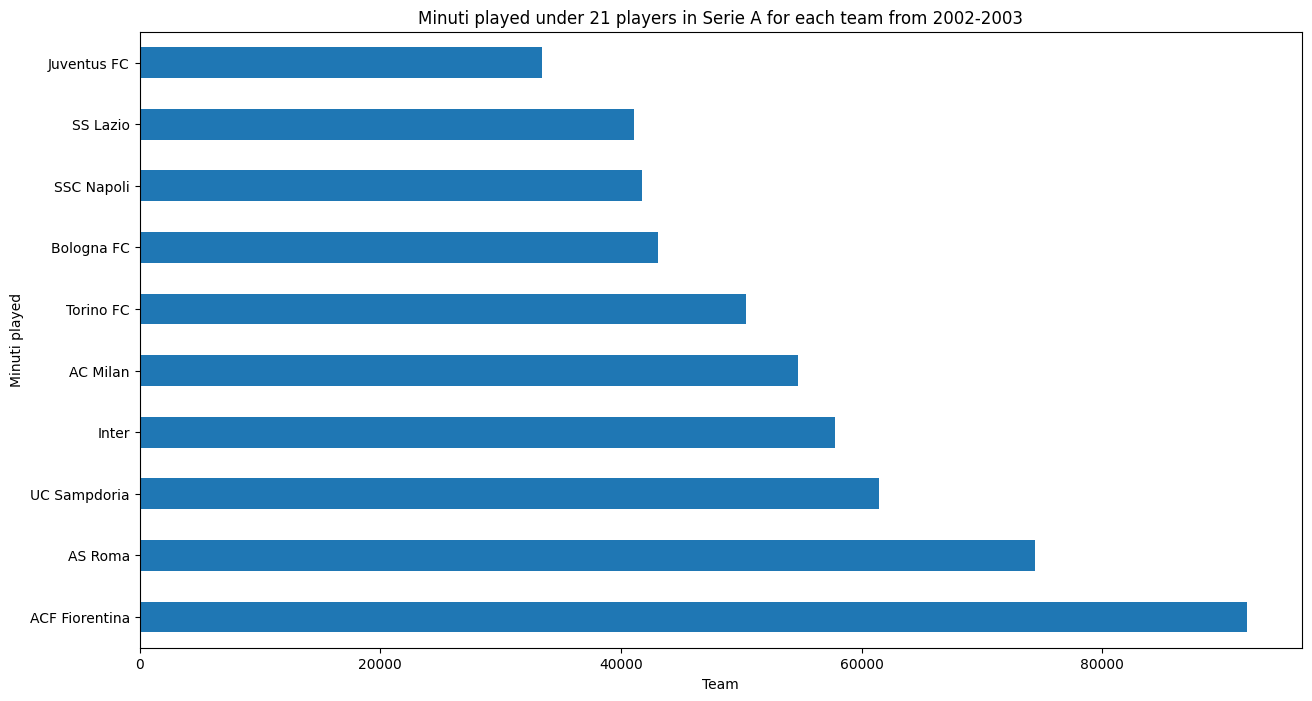

In [10]:
#create a histogram with the minutes played by each team o the dataset
top_teams.sum().sort_values(ascending=False)[:-2].plot(kind='barh',figsize=(15,8))
plt.title("Minuti played under 21 players in Serie A for each team from 2002-2003")
plt.ylabel("Minuti played")
plt.xlabel("Team")
plt.show()

In [13]:
#esegue la media dei minuti giocati normalizzati ogni 8 stagioni
mins_played_10=pd.DataFrame(columns=["Minutes_played_under21"])
mins_played_10.loc["1969-1976","Minutes_played_under21"]=mins_played["Minutes_played_under21"][0:8].mean()
mins_played_10.loc["1977-1984","Minutes_played_under21"]=mins_played["Minutes_played_under21"][8:16].mean()
mins_played_10.loc["1985-1992","Minutes_played_under21"]=mins_played["Minutes_played_under21"][16:24].mean()
mins_played_10.loc["1993-2000","Minutes_played_under21"]=mins_played["Minutes_played_under21"][24:32].mean()
mins_played_10.loc["2001-2008","Minutes_played_under21"]=mins_played["Minutes_played_under21"][32:40].mean()
mins_played_10.loc["2009-2017","Minutes_played_under21"]=mins_played["Minutes_played_under21"][40:48].mean()
mins_played_10.loc["2017-2022","Minutes_played_under21"]=mins_played["Minutes_played_under21"][48:].mean()

mins_played_10.loc["1969-1976","Minutes_played_italians"]=(mins_played["Minutes_played_italians"][0:8]+mins_played["Minutes_played_oriundi"][0:8]).mean()
mins_played_10.loc["1977-1984","Minutes_played_italians"]=(mins_played["Minutes_played_italians"][8:16]+mins_played["Minutes_played_oriundi"][8:16]).mean()
mins_played_10.loc["1985-1992","Minutes_played_italians"]=(mins_played["Minutes_played_italians"][16:24]+mins_played["Minutes_played_oriundi"][16:24]).mean()
mins_played_10.loc["1993-2000","Minutes_played_italians"]=(mins_played["Minutes_played_italians"][24:32]+mins_played["Minutes_played_oriundi"][24:32]).mean()
mins_played_10.loc["2001-2008","Minutes_played_italians"]=(mins_played["Minutes_played_italians"][32:40]+mins_played["Minutes_played_oriundi"][32:40]).mean()
mins_played_10.loc["2009-2017","Minutes_played_italians"]=(mins_played["Minutes_played_italians"][40:48]+mins_played["Minutes_played_oriundi"][40:48]).mean()
mins_played_10.loc["2017-2022","Minutes_played_italians"]=(mins_played["Minutes_played_italians"][48:]+mins_played["Minutes_played_oriundi"][48:]).mean()


mins_played_10.loc["1969-1976","Minutes_played_foreigners"]=mins_played["Minutes_played_foreigners"][0:8].mean()
mins_played_10.loc["1977-1984","Minutes_played_foreigners"]=mins_played["Minutes_played_foreigners"][8:16].mean()
mins_played_10.loc["1985-1992","Minutes_played_foreigners"]=mins_played["Minutes_played_foreigners"][16:24].mean()
mins_played_10.loc["1993-2000","Minutes_played_foreigners"]=mins_played["Minutes_played_foreigners"][24:32].mean()
mins_played_10.loc["2001-2008","Minutes_played_foreigners"]=mins_played["Minutes_played_foreigners"][32:40].mean()
mins_played_10.loc["2009-2017","Minutes_played_foreigners"]=mins_played["Minutes_played_foreigners"][40:48].mean()
mins_played_10.loc["2017-2022","Minutes_played_foreigners"]=mins_played["Minutes_played_foreigners"][48:].mean()

#mins_played_10.head(8)

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,8))
sns.barplot(x=mins_played.index, y=mins_played["Minutes_played_under21"])
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Percentage Minutes played")
plt.title("Percentage Minutes played by under-21 players Serie A")
#print line mean
plt.axhline(mins_played["Minutes_played_under21"].mean(), color='red', linestyle='--')

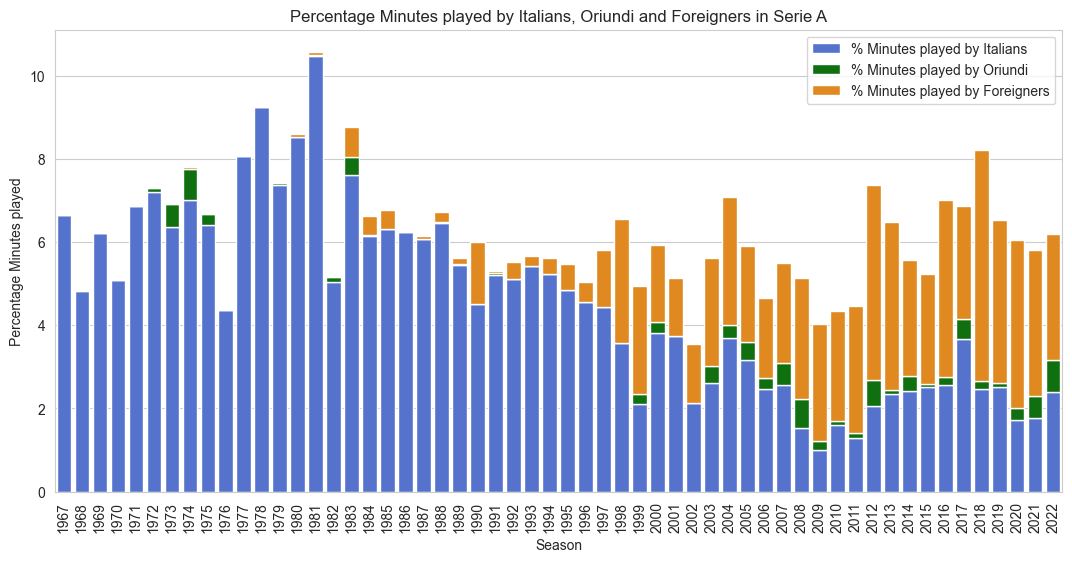

In [14]:
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")
# Crea l'istogramma utilizzando Seaborn
sns.barplot(data=mins_played, x=mins_played.index, y="Minutes_played_italians", color="royalblue",label="% Minutes played by Italians")
sns.barplot(data=mins_played, x=mins_played.index, y="Minutes_played_oriundi",color="green",label="% Minutes played by Oriundi", bottom=mins_played["Minutes_played_italians"])
sns.barplot(data=mins_played, x=mins_played.index, y="Minutes_played_foreigners",color="darkorange",label="% Minutes played by Foreigners", bottom=mins_played["Minutes_played_italians"] + mins_played["Minutes_played_oriundi"])

# Aggiungi etichette e titoli
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Percentage Minutes played') 
plt.title('Percentage Minutes played by Italians, Oriundi and Foreigners in Serie A')

# Aggiungi legenda
plt.legend()

# Mostra l'istogramma
plt.show()

Text(0.5, 1.0, 'Percentual minutes played by Under 21 players every 8 seasons')

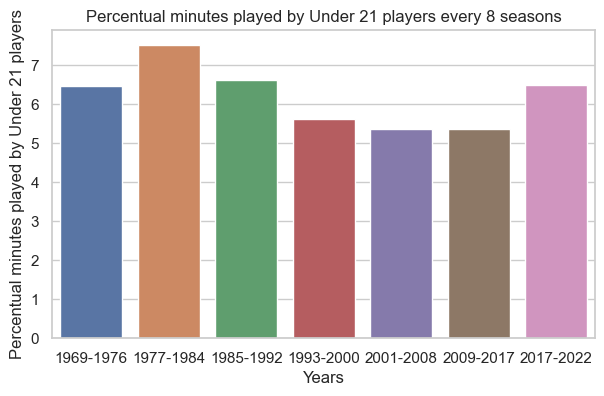

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,4))
#plto two column of barplot for the percentage of minutes played by under 21 italians players and for the percentage of minutes played by under 21 foreigner players

sns.barplot(x=mins_played_10.index, y=mins_played_10["Minutes_played_under21"])

plt.xlabel("Years")
plt.ylabel("Percentual minutes played by Under 21 players")
plt.title("Percentual minutes played by Under 21 players every 8 seasons")

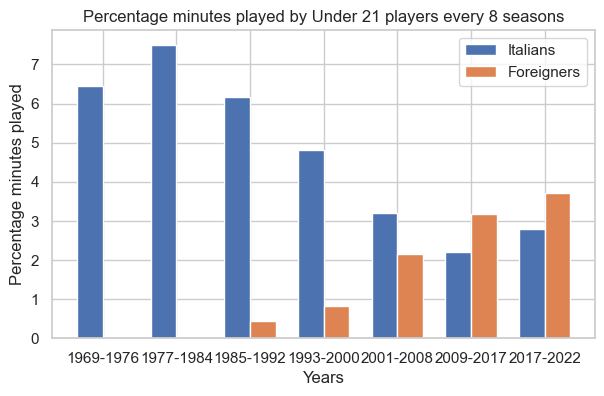

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,4))
larghezza_barre = 0.35
barre_italiani = np.arange(len(mins_played_10.index))
barre_stranieri = [x + larghezza_barre for x in barre_italiani]

# Creazione dell'istogramma
plt.bar(barre_italiani, mins_played_10["Minutes_played_italians"], width=larghezza_barre, label='Italians')
plt.bar(barre_stranieri, mins_played_10["Minutes_played_foreigners"],width=larghezza_barre,  label='Foreigners')

# Personalizzazione del grafico
plt.xlabel('Years')
plt.ylabel('Percentage minutes played')
plt.title('Percentage minutes played by Under 21 players every 8 seasons')
plt.xticks([r + larghezza_barre / 2 for r in range(len(mins_played_10.index))], mins_played_10.index)
plt.legend()

# Visualizzazione del grafico
plt.show()

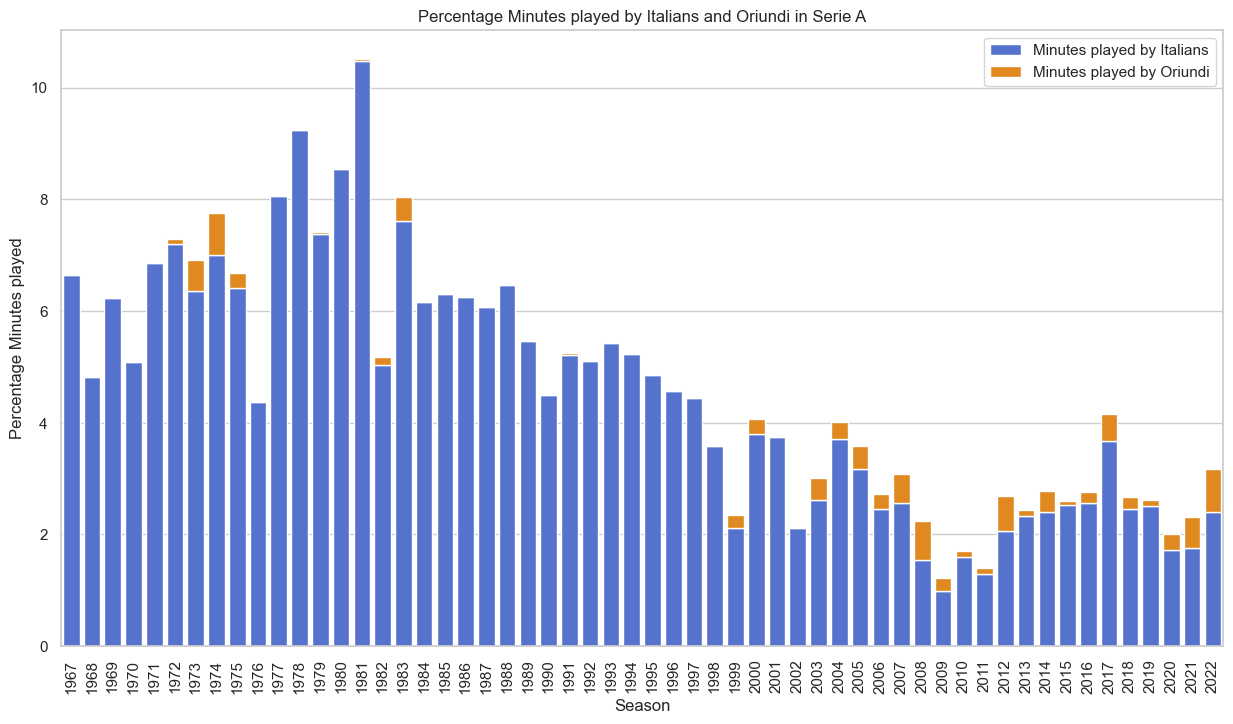

In [17]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
# Crea l'istogramma utilizzando Seaborn
sns.barplot(data=mins_played, x=mins_played.index, y="Minutes_played_italians", color="royalblue",label="Minutes played by Italians")
sns.barplot(data=mins_played, x=mins_played.index, y="Minutes_played_oriundi",color="darkorange",label="Minutes played by Oriundi", bottom=mins_played["Minutes_played_italians"])

# Aggiungi etichette e titoli
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Percentage Minutes played') 
plt.title('Percentage Minutes played by Italians and Oriundi in Serie A')

# Aggiungi legenda
plt.legend()

# Mostra l'istogramma
plt.show()

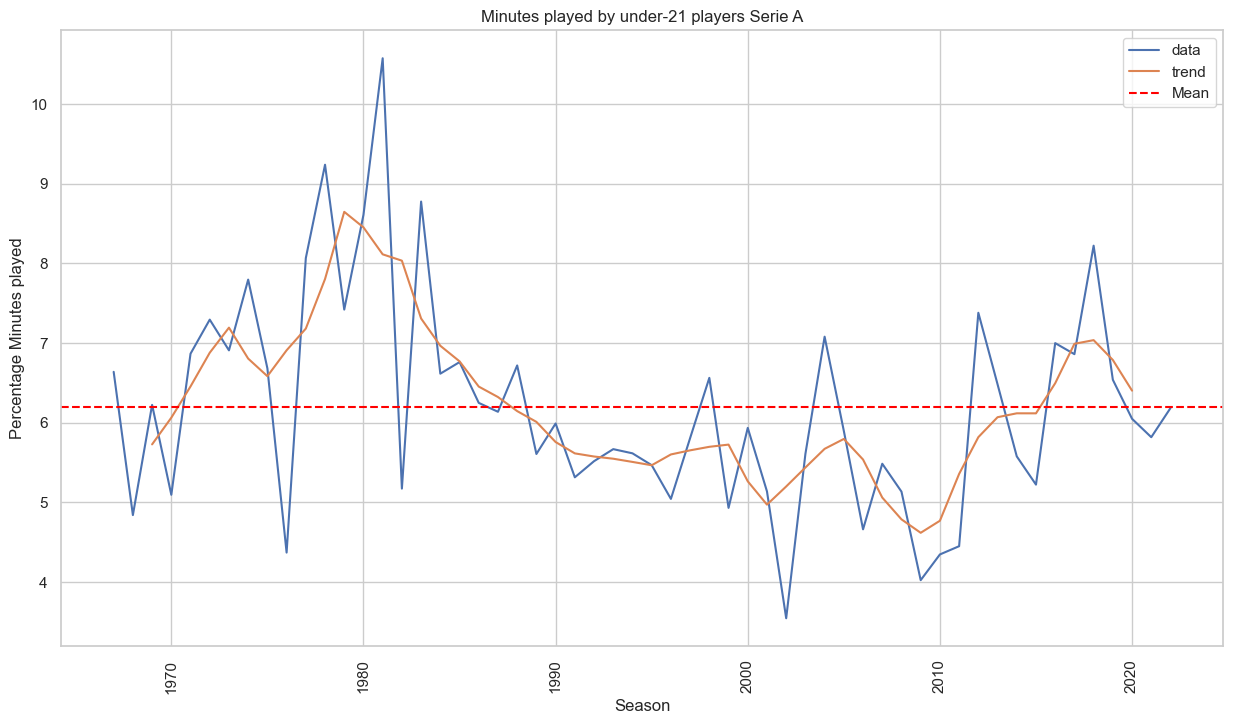

In [18]:
result = seasonal_decompose(mins_played["Minutes_played_under21"], model='additive',period=4)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.plot(mins_played.index,mins_played["Minutes_played_under21"],label="data",linewidth=1.5)
plt.plot(mins_played.index,result.trend,label="trend")


plt.xlabel("Season")
plt.ylabel("Percentage Minutes played")
plt.title("Minutes played by under-21 players Serie A")
#rotate the x ticks
plt.xticks(rotation=90)
plt.axhline(mins_played["Minutes_played_under21"].mean(), color='red', linestyle='--',label="Mean")
plt.legend()
plt.show()

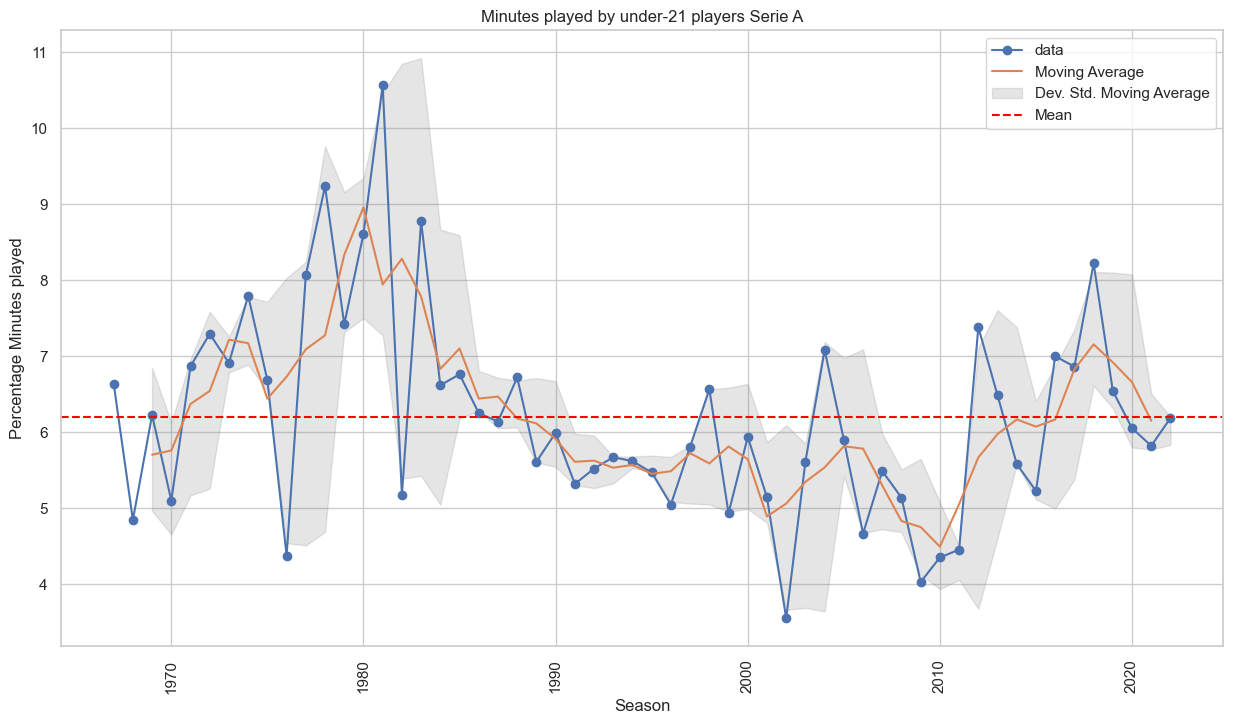

In [19]:

#print a line plot with the minutes played normalized with line mean and marker 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.plot(mins_played.index,mins_played["Minutes_played_under21"],marker='o',label="data")

plt.xlabel("Season")
plt.ylabel("Percentage Minutes played")
plt.title("Minutes played by under-21 players Serie A")
#rotate the x ticks

mins_played["Minutes_played_under21"].rolling(4,center=True).mean().plot(label="Moving Average")
#stampa anche la rolling variance

plt.fill_between(mins_played.index, mins_played["Minutes_played_under21"].rolling(3).mean() - mins_played["Minutes_played_under21"].rolling(3).std(), mins_played["Minutes_played_under21"].rolling(3).mean() + mins_played["Minutes_played_under21"].rolling(3).std(), color='gray', alpha=0.2, label='Dev. Std. Moving Average')


plt.xticks(rotation=90)
plt.axhline(mins_played["Minutes_played_under21"].mean(), color='red', linestyle='--',label="Mean")
plt.legend()
plt.show()

